# Problem Statement :

The <b>Bank Marketing data</b> is related with <b>direct marketing campaigns</b> of a Portuguese banking institution. 

- The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 
<br>

- The <b>classification goal</b> is to <b>predict</b> if the <b>client will subscribe a term deposit (variable y)</b>.

# Predictor / Independent Variables :

<b>1. age :</b> (numeric)
<br>

<b>2. job :</b> type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
<br>

<b>3. marital :</b> marital status (categorical: “divorced”, “married”, “single”, “unknown”)
<br>

<b>4. education :</b> (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
<br>

<b>5. default :</b> has credit in default? (categorical: “no”, “yes”, “unknown”).
<br>

<b>6. housing :</b> has housing loan? (categorical: “no”, “yes”, “unknown”)
<br>

<b>7. loan :</b> has personal loan? (categorical: “no”, “yes”, “unknown”)
<br>

<b>8. contact :</b> contact communication type (categorical: “cellular”, “telephone”)
<br>

<b>9. month :</b> last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
<br>

<b>10. day_of_week :</b> last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
<br>

<b>11. duration :</b> last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
<br>

<b>12. campaign :</b> number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>

<b>13. pdays :</b> number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>

<b>14. previous :</b> number of contacts performed before this campaign and for this client (numeric)
<br>

<b>15. poutcome :</b> outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
<br>

<b>16. emp.var.rate :</b> employment variation rate — (numeric)
<br>

<b>17. cons.price.idx :</b> consumer price index — (numeric)
<br>

<b>18. cons.conf.idx :</b> consumer confidence index — (numeric)
<br>

<b>19. euribor3m :</b> euribor 3 month rate — (numeric)
<br>

<b>20. nr.employed :</b> number of employees — (numeric)
<br>

# Target / Dependent Variable :

<b>1. y : </b> has the client subscribed a <b>term deposit ? </b> (binary: <b>“1” means “Yes”, “0” means “No”</b> )

# Setting Location of DataSet (CSV File) :

In [1]:
# Setting Location of Dataset :

dataset_location = "D:/Hackathon FS-ADM/bank/"

result_location = "D:/Hackathon FS-ADM/Final_Outcome/"

In [2]:
# Importing Required Libraries :

import pandas as pd
import numpy as np

# Classification Algorithms :

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Pre-Processing :

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Metrics :

from sklearn import metrics as m
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cross_validation import cross_val_score , train_test_split

# Visualization :

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\vetrivel_p02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Importing CSV File into Pandas DataFrame :

In [3]:
# Reading CSV File into Pandas DataFrame using ";" as Seperator :

data = pd.read_csv(dataset_location+'bank-full.csv',sep=";",header=0)

# View the First 5 rows of DataFrame :

data.head()

print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# View the Last 5 rows of DataFrame :

data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Extracting Information on Columns :

In [5]:
# Prints Information of All Columns :

data.info()
# or 
# data.info(verbose=True) 

# Prints a Summary of Columns Count and its dtypes but not per column Information :

# data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Extracting Statistical Information on Numerical Columns :

In [6]:
# Shows Descriptive Statistics Values on Numerical Value based Features :

data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Finding Correlation between Features and Class for Selection :

### 1. Using PairPlot :

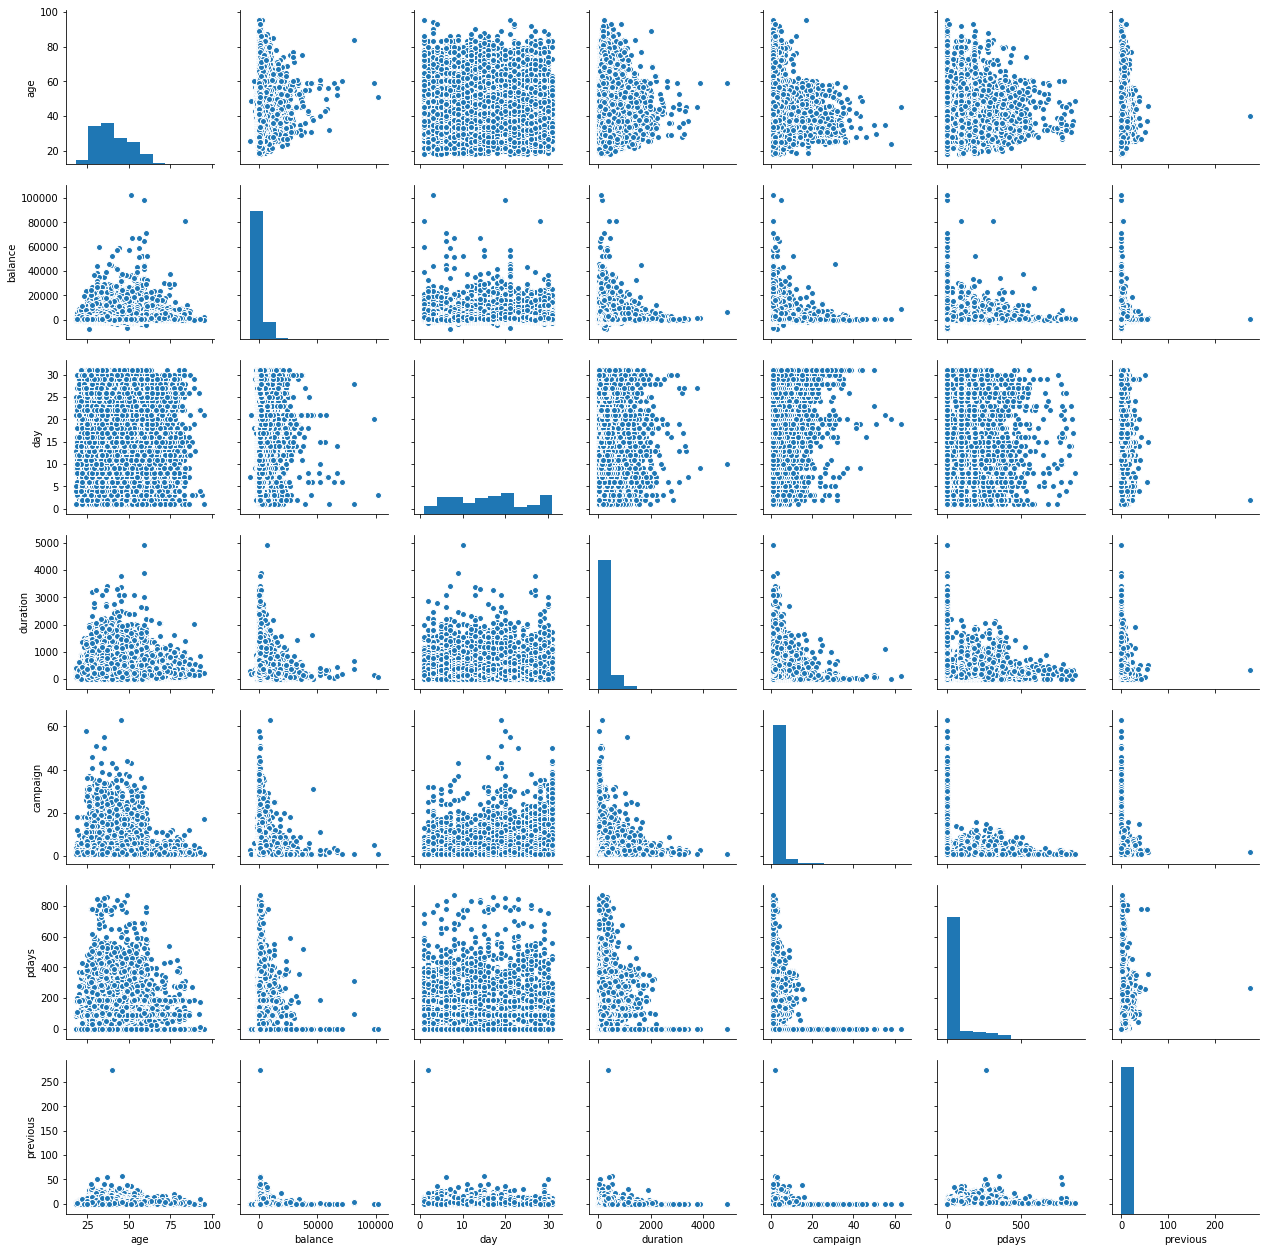

In [7]:
sns.pairplot(data)

### 2. Correlation Matrix :

In [8]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


### 3. Heatpot to Visualise Correlation

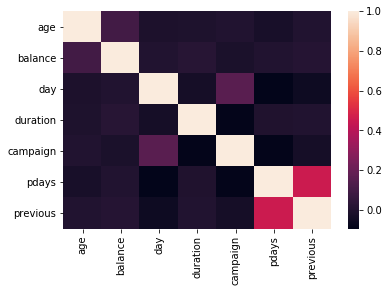

In [9]:
sns.heatmap(data.corr())

# <b>As per Pair Plot, Correlation Matrix and Heatmap</b> 

<b>Observations are as follows :</b> 
<br>

1. Data is non-linear and asymmetric
<br>

2. Hence selection of features will not depend upon correlation factor.
<br>

3. Also not a single feature is correlated completely with class, hence requires combinantion of features.

# <b>Feature Selection techniques : </b>

1. <b> Univariate Selection (Non-Negative features) </b>
<br>

2. <b> Recursive Feature Elimination (RFE) </b>
<br>

3. <b> Principal Component Analysis (PCA) (Dimensionality Reduction Technique) </b>
<br>

4. <b> Feature Importance (Decision Trees Technique) </b>

# <b>Which feature selection technique should be used for our data?</b>
1. Contains negative values, hence Univariate Selection technique cannot be used.
<br>

2. PCA is data reduction technique. <b>Our Aim is to select best possible feature and not reduction</b> and this is classification type of data. PCA is also an unsupervised method, used for dimensionality reduction.
<br>

3. Hence <b>Feature Importance (Decision Tree Technique)</b> and <b>Recursive Feature Elimination (RFE)</b> can be used for feature selection.
<br>

4. Best possible technique will be which extracts columns who provide better accuracy.
<br>

# Exploring Target Varaible :

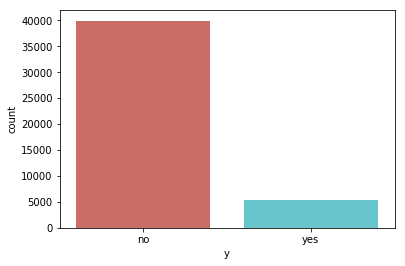

In [10]:
# Barplot for the Target / Dependent Variable :

sns.countplot(x='y',data=data, palette='hls')
plt.show()

# Exploring Predictor Variables / Features :

In [11]:
# View the (Rows,Columns) in DataFrame :

data.shape

(45211, 17)

### Find and Impute Missing Values : 

In [12]:
# Sum of Missing Values in Each Column :

data.isnull().sum()

# NOTE : Since there are No Missing Values in any of the Columns, Imputation is not needed.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Finding Duplicating using Unique and Value Counts :

In [13]:
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [14]:
# Unique Education Values :

print(data['education'].unique())
print(data['education'].nunique())

['tertiary' 'secondary' 'unknown' 'primary']
4


In [15]:
# Cross Tab to display Education stats with respect to y (ie) Target variable :

pd.crosstab(index=data["education"], columns=data["y"])

y,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


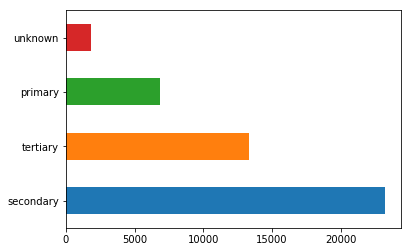

In [16]:
# Education Categories and Frequency :

data.education.value_counts().plot(kind="barh")

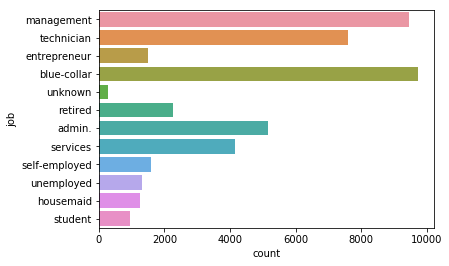

In [17]:
# Barplot for the Predictor / Independent Variable - job : 

sns.countplot(y="job", data=data)
plt.show()

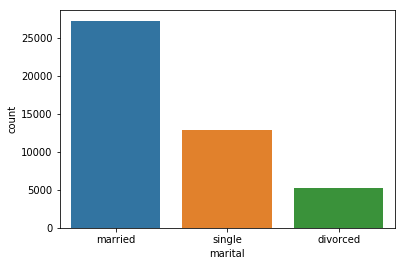

In [18]:
# Barplot for the Predictor / Independent Variable - marital : 

sns.countplot(x="marital", data=data)
plt.show()

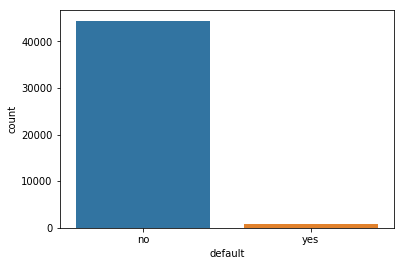

In [19]:
# Barplot for the Predictor / Independent Variable - default : 

sns.countplot(x="default", data=data)
plt.show()

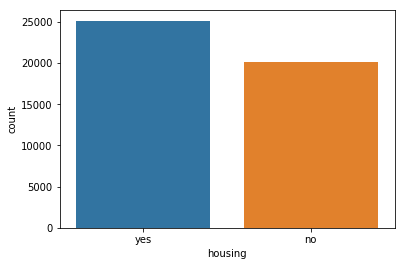

In [20]:
# Barplot for the Predictor / Independent Variable - housing : 

sns.countplot(x="housing", data=data)
plt.show()

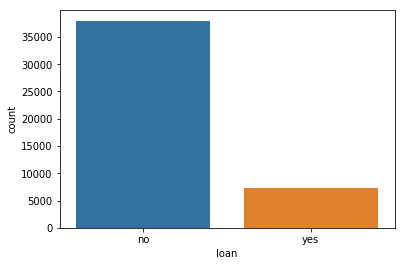

In [21]:
# Barplot for the Predictor / Independent Variable - loan : 

sns.countplot(x="loan", data=data)
plt.show()

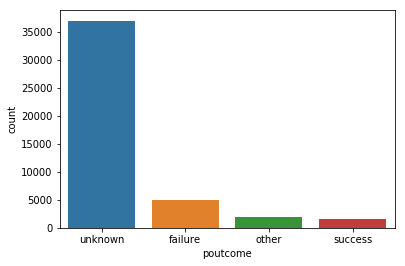

In [22]:
# Barplot for the Predictor / Independent Variable - poutcome : 

sns.countplot(x="poutcome", data=data)
plt.show()

# Assumption 1 :

- <b>Our prediction will be based on the customer’s job, marital status, whether he(she) has credit in default, whether he(she) has a housing loan, whether he(she) has a personal loan, and the outcome of the previous marketing campaigns. So, we will drop the variables that we do not need.</b>

In [23]:
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [24]:
# Removing 
# 0 - age
# 3 - education
# 8 - contact
# 9 - day
# 10 - month
# 11 - duration
# 12 - campaign
# 13 - plays

data.drop(data.columns[[0,3,8,9,10,11,12,13]],axis=1,inplace=True)

In [25]:
data.head(2)

,job,marital,default,balance,housing,loan,previous,poutcome,y
0,management,married,no,2143,yes,no,0,unknown,no
1,technician,single,no,29,yes,no,0,unknown,no


# Exploring Categorical and Numerical Data into Digits Form :

### Converting Object Type to Integer using One-Hot Encoding :

In [26]:
# Fetching Data Type of all Columns :

data.dtypes

job         object
marital     object
default     object
balance      int64
housing     object
loan        object
previous     int64
poutcome    object
y           object
dtype: object

In [27]:
# Creating Dummies for Categorical Variables :

data_new = pd.get_dummies(data, columns=['job','marital',
                                         'default',
                                         'housing','loan',
                                         'poutcome'])

# data_new = pd.get_dummies(data, columns=['job','marital',
#                                          'education','default',
#                                          'housing','loan',
#                                          'contact','month',
#                                          'poutcome'])

In [28]:
# Coverting Target Variable / Column into Binary Format :

data_new.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [29]:
# Successfully converted Object data into  Integer data types

data_new.dtypes

balance              int64
previous             int64
y                    int64
job_admin.           uint8
job_blue-collar      uint8
job_entrepreneur     uint8
job_housemaid        uint8
job_management       uint8
job_retired          uint8
job_self-employed    uint8
job_services         uint8
job_student          uint8
job_technician       uint8
job_unemployed       uint8
job_unknown          uint8
marital_divorced     uint8
marital_married      uint8
marital_single       uint8
default_no           uint8
default_yes          uint8
housing_no           uint8
housing_yes          uint8
loan_no              uint8
loan_yes             uint8
poutcome_failure     uint8
poutcome_other       uint8
poutcome_success     uint8
poutcome_unknown     uint8
dtype: object

# Classifiers : Based on the values of different parameters we can conclude to the following classifiers for Binary Classification.

<br>
1. AdaBoosting
2. Linear Discriminant Analysis
3. Logistics Regression
4. Random Forest Classifier
5. K Nearest Neighbour
6. Decision Tree
7. Gaussian Naive Bayes
8. Support Vector Classifier 
9. Gradient Boosting

In [30]:
# Creating Dictionary with Classifiers :

classifiers = {
                 
               '1. Adaptive Boosting Classifier':AdaBoostClassifier(),
#                '2. Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
#                '3. Logistic Regression':LogisticRegression(),
#                '4. Random Forest Classifier': RandomForestClassifier(),
#                '5. K Nearest Neighbour':KNeighborsClassifier(8),
                    
               '6.1 Decision Tree Classifier':DecisionTreeClassifier(random_state=1,max_depth=7),           
#                '6.2 Decision Tree Classifier 6':DecisionTreeClassifier(random_state=1,max_depth=6),
                           
               
#                '7. Gaussian Naive Bayes Classifier':GaussianNB(),
               # '8. Support Vector Classifier':SVC(),
               '9. Gradient Boosting Classifier':GradientBoostingClassifier()
               }
print(classifiers)

{'1. Adaptive Boosting Classifier': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None), '6.1 Decision Tree Classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'), '6.2 Decision Tree Classifier 6': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'), '9. Gradient Boosting Classifier': GradientBoostingClassifier(criterion='friedman

In [31]:
# View the (Rows,Columns) in DataFrame :
# Due to One Hot Encoding Increase in the Number of Columns :

data_new.shape

(45211, 28)

In [32]:
# Seperating Predictor and Target Columns into X and y Respectively :

data_X = data_new.drop(['y'], axis=1)
data_y = pd.DataFrame(data_new['y'])

print(data_X.head())
print(data_y.head())

   balance  previous  job_admin.  job_blue-collar  job_entrepreneur  \
0     2143         0           0                0                 0   
1       29         0           0                0                 0   
2        2         0           0                0                 1   
3     1506         0           0                1                 0   
4        1         0           0                0                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              0               1            0                  0   
1              0               0            0                  0   
2              0               0            0                  0   
3              0               0            0                  0   
4              0               0            0                  0   

   job_services        ...         default_no  default_yes  housing_no  \
0             0        ...                  1            0           0   
1             0 

In [33]:
# Log Columns Headings :

log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","ROC_AUC_Score","CV_2_Fold","CV_5_Fold","CV_10_Fold","CV_20_Fold"]
log = pd.DataFrame(columns=log_cols)

# Metric Columns Headings :

# metrics_cols = ["Precision Score","Recall Score","F1-Score","roc-ROC_AUC_Score"]
# metric = pd.DataFrame(columns=metrics_cols)

# Performance Metric using Precision and Recall Calculation along with roc_auc_score & accuracy_score :

1. Adaptive Boosting Classifier
TRAIN: [22890 38580 16790 ... 10563 12426 21205] TEST: [28922 23656 33315 ... 24447 13117 44215]


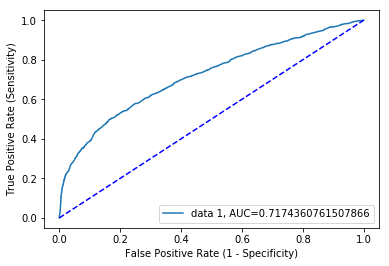

1. Adaptive Boosting Classifier
TRAIN: [32811 26383  7072 ... 13894 14690 29467] TEST: [18840 17731 34065 ... 41680 22958 41110]


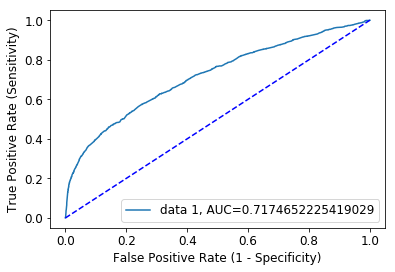

6.1 Decision Tree Classifier
TRAIN: [22890 38580 16790 ... 10563 12426 21205] TEST: [28922 23656 33315 ... 24447 13117 44215]


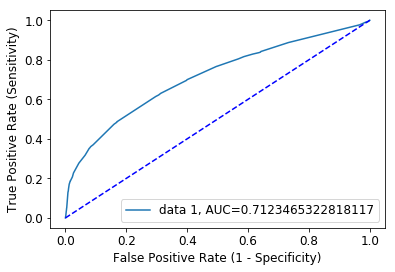

6.1 Decision Tree Classifier
TRAIN: [32811 26383  7072 ... 13894 14690 29467] TEST: [18840 17731 34065 ... 41680 22958 41110]


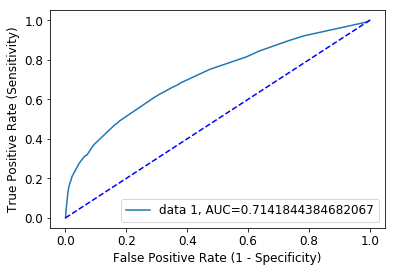

6.2 Decision Tree Classifier 6
TRAIN: [22890 38580 16790 ... 10563 12426 21205] TEST: [28922 23656 33315 ... 24447 13117 44215]


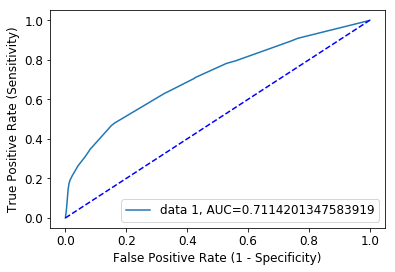

6.2 Decision Tree Classifier 6
TRAIN: [32811 26383  7072 ... 13894 14690 29467] TEST: [18840 17731 34065 ... 41680 22958 41110]


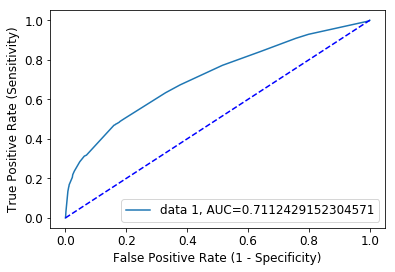

9. Gradient Boosting Classifier
TRAIN: [22890 38580 16790 ... 10563 12426 21205] TEST: [28922 23656 33315 ... 24447 13117 44215]


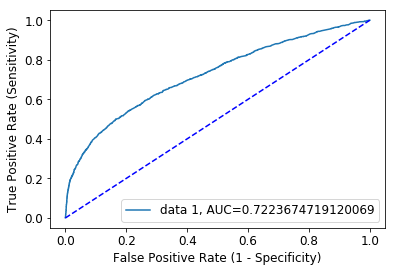

9. Gradient Boosting Classifier
TRAIN: [32811 26383  7072 ... 13894 14690 29467] TEST: [18840 17731 34065 ... 41680 22958 41110]


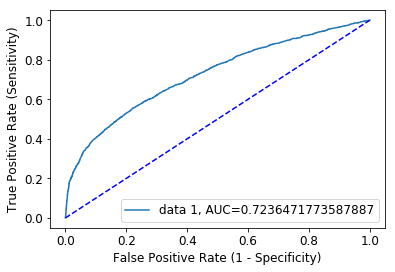

In [34]:
import warnings
warnings.filterwarnings('ignore')

rs = StratifiedShuffleSplit(n_splits=2, test_size=0.3,random_state=2)
rs.get_n_splits(data_X,data_y)

for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        
        print(Name)
        
        print("TRAIN:", train_index, "TEST:", test_index)
        
        # Splitting Training and Testing Data :
        
        X_train,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y_train,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
                              
        # Scaling of Features :
        
        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        
        # Fitting of Train Data and Predicting with Test Data :
        
        cls = classify
        cls =cls.fit(X_train,y_train)
        y_out = cls.predict(X_test)
        
        # Calculating Accuracy, Precision, Recall, ROC_AUC and F1 Scores :
        
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        roc_auc = m.roc_auc_score(y_out,y_test)
        f1_score = m.f1_score(y_test,y_out,average='macro')
        
        # Calculating Cross-Validation AUC Score :
        
        cross_val_score_2_fold = cross_val_score(classify, X_train, y_train['y'], cv=2, scoring='roc_auc').mean()
        cross_val_score_5_fold = cross_val_score(classify, X_train, y_train['y'], cv=5, scoring='roc_auc').mean()
        cross_val_score_10_fold = cross_val_score(classify, X_train, y_train['y'], cv=10, scoring='roc_auc').mean()
        cross_val_score_20_fold = cross_val_score(classify, X_train, y_train['y'], cv=20, scoring='roc_auc').mean()
                
        # Classification Report for All Classification Models :
        
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc,cross_val_score_2_fold,cross_val_score_5_fold,cross_val_score_10_fold,cross_val_score_20_fold]], columns=log_cols)
        log = log.append(log_entry)
        
        # Creating DataFrame with  2 Columns , Replacing Numbers with Category, Saving Target Prediction as CSV File with Index :
        # 'Index' => Index of Test Data of Predictor 'y_test' 
        # 'Term_Deposit' => Predicted Output of Target 'X_test' 
        
        df = pd.DataFrame({'Index': y_test.index.tolist(), 'Term_Deposit': y_out})        
        df['Term_Deposit'].replace((1, 0), ('yes', 'no'), inplace=True)        
        df.to_csv(result_location + "Term_Deposit_"+Name+".csv", header=['Index','Term_Deposit'],index=0)
        
        # Plotting ROC-AUC using True Positive Rate (Sensitivity) vs False Positive Rate (1 - Specificity) :  
        
        y_pred_proba = classify.predict_proba(X_test)[::,1]
        fpr, tpr, threshold = m.roc_curve(y_test,  y_pred_proba)
        #    auc = metrics.auc(fpr,tpr)
        #    IMPORTANT: first argument is true values, second argument is predicted probabilities
        auc = m.roc_auc_score(y_test, y_pred_proba)
     
        plt.plot(fpr,tpr,label="data 1, AUC="+str(auc))
        plt.legend(loc=4)
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.rcParams['font.size'] = 12
        
        plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
        
        plt.show()
        
                
#Scroll complete output to view all the accuracy scores and bar graph.

In [35]:
log

,Classifier,Accuracy,Precision Score,Recall Score,F1-Score,ROC_AUC_Score,CV_2_Fold,CV_5_Fold,CV_10_Fold,CV_20_Fold
0,1. Adaptive Boosting Classifier,0.892141,0.779009,0.575418,0.600911,0.779009,0.715784,0.716777,0.716314,0.716746
0,1. Adaptive Boosting Classifier,0.892141,0.781351,0.573778,0.598665,0.781351,0.713732,0.716973,0.715805,0.717257
0,6.1 Decision Tree Classifier,0.891994,0.771934,0.579708,0.606590,0.771934,0.687968,0.697305,0.702535,0.702942
0,6.1 Decision Tree Classifier,0.891035,0.768945,0.572879,0.597007,0.768945,0.688827,0.702143,0.704090,0.705891
0,6.2 Decision Tree Classifier 6,0.892804,0.781277,0.579620,0.606844,0.781277,0.691840,0.703426,0.702369,0.704276
0,6.2 Decision Tree Classifier 6,0.891772,0.777757,0.573023,0.597482,0.777757,0.693775,0.701812,0.703337,0.705188
0,9. Gradient Boosting Classifier,0.892067,0.777427,0.575923,0.601566,0.777427,0.718589,0.719320,0.719058,0.719305
0,9. Gradient Boosting Classifier,0.892141,0.780160,0.574598,0.599791,0.780160,0.715371,0.718944,0.719674,0.719270


### 1. Accuracy Score Comparison for All Classification Models :

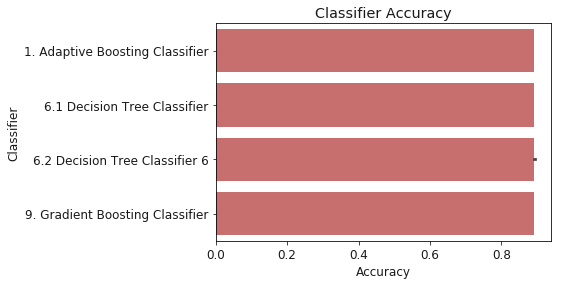

In [36]:
# Accuracy Score Comparison :

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="r")  
plt.show()

### 2. Precision Score Comparison for All Classification Models :

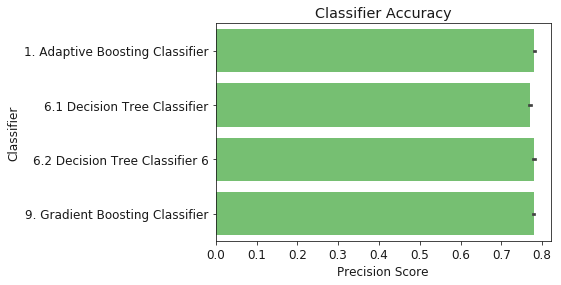

In [37]:
# Precision Score Comparison :

plt.xlabel('Precision Score')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Precision Score', y='Classifier', data=log, color="g")  
plt.show()

### 3. Recall Score Comparison for All Classification Models :

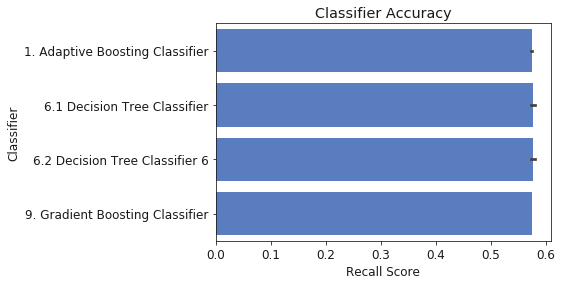

In [38]:
# Recall Score Comparison :

plt.xlabel('Recall Score')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Recall Score', y='Classifier', data=log, color="b")  
plt.show()

### 4. ROC_AUC Score Comparison for All Classification Models :

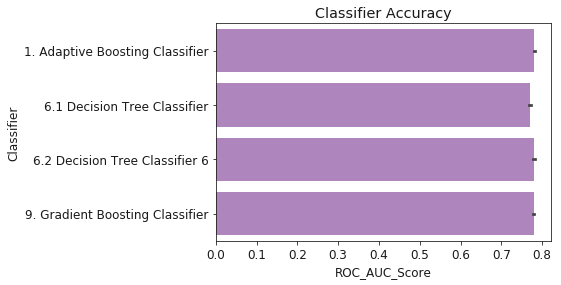

In [39]:
# ROC_AUC Score Comparison :

plt.xlabel('ROC_AUC_Score')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='ROC_AUC_Score', y='Classifier', data=log, color="m")  
plt.show()

### 5. F1 Score Comparison for All Classification Models :

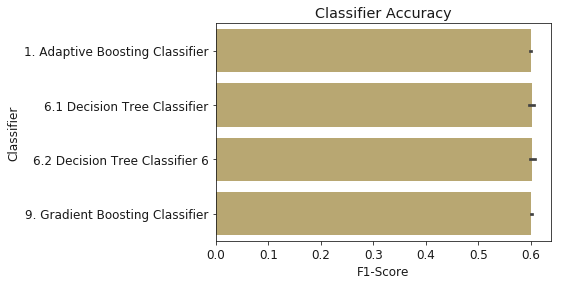

In [40]:
# F1 Score Comparison :

plt.xlabel('F1-Score')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='F1-Score', y='Classifier', data=log, color="y")  
plt.show()

### 6. CV_2_Fold Comparison for All Classification Models :

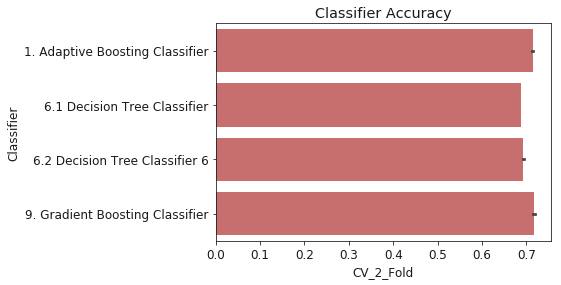

In [41]:
# CV_2_Fold Comparison :

plt.xlabel('CV_2_Fold')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='CV_2_Fold', y='Classifier', data=log, color="r")  
plt.show()

### 7. CV_5_Fold Comparison for All Classification Models :

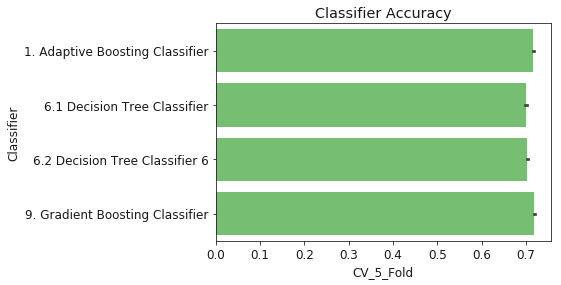

In [42]:
# CV_5_Fold Comparison :

plt.xlabel('CV_5_Fold')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='CV_5_Fold', y='Classifier', data=log, color="g")  
plt.show()

### 8. CV_10_Fold Comparison for All Classification Models :

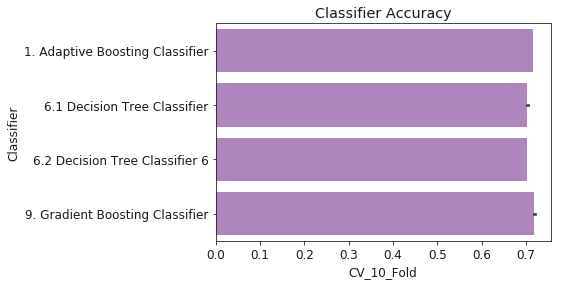

In [43]:
# CV_10_Fold Comparison :

plt.xlabel('CV_10_Fold')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='CV_10_Fold', y='Classifier', data=log, color="m")  
plt.show()

### 9. CV_20_Fold Comparison for All Classification Models :

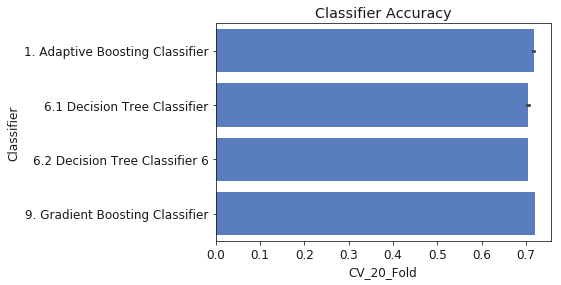

In [44]:
# CV_20_Fold Comparison :

plt.xlabel('CV_20_Fold')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='CV_20_Fold', y='Classifier', data=log, color="b")  
plt.show()